# Deep Learning


In [1]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
# pip install tensorflow (executar no Anaconda Prompt)


2022-06-17 08:40:36.765729: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-17 08:40:36.765845: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


11490434/11490434 [==============================] - 14s 1us/step


Text(0.5, 1.0, '0')

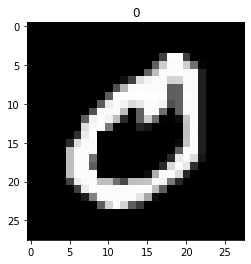

In [2]:
# Obtenção dos dados e divisão automática entre treinamento e teste
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()
# Visualização de imagens específicas
plt.imshow(X_treinamento[21], cmap='gray')
plt.title(y_treinamento[21])


In [3]:
# Mudança de dimensão, originalmente está em 28x28 e precisamos 784
X_treinamento = X_treinamento.reshape(
    (len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))
X_teste[0]


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [4]:
# Transformação dos dados para float para podermos normalizar os dados
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')


In [5]:
# Normalização (255 é o valor máximo de um pixel)
X_treinamento /= 255
X_teste /= 255


In [6]:
# Transformação para o formato dummy (temos 10 classes)
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)
y_teste[0]


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [7]:
# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
# Dropout é utilizado para zerar uma porcentagem dos neurônios, para evitar o overfitting
modelo = Sequential()
modelo.add(Dense(units=64, activation='relu', input_dim=784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=64, activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=64, activation='relu'))
modelo.add(Dropout(0.2))
# camada de saida, softmax probabilidade
modelo.add(Dense(units=10, activation='softmax'))


2022-06-17 08:40:57.028171: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-17 08:40:57.028241: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-17 08:40:57.028262: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ryzen): /proc/driver/nvidia/version does not exist
2022-06-17 08:40:57.028675: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# Visualização da estrutura da rede neural
modelo.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                6

In [9]:
# Configuração dos parâmetros da rede neural e treinamento (utilizando base de dados de validação)
# Na variável historico temos os histórico das execuções (erro e accuracy)
modelo.compile(optimizer='adam', loss='categorical_crossentropy',
               metrics=['accuracy'])
historico = modelo.fit(X_treinamento, y_treinamento, epochs=20,
                       validation_data=(X_teste, y_teste))


Epoch 1/20


2022-06-17 08:40:57.357073: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 9s 5ms/step - loss: 0.4463 - accuracy: 0.8644 - val_loss: 0.1856 - val_accuracy: 0.9458
Epoch 2/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2271 - accuracy: 0.9344 - val_loss: 0.1257 - val_accuracy: 0.9628
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1885 - accuracy: 0.9467 - val_loss: 0.1088 - val_accuracy: 0.9669
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1647 - accuracy: 0.9521 - val_loss: 0.1110 - val_accuracy: 0.9680
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1479 - accuracy: 0.9561 - val_loss: 0.1073 - val_accuracy: 0.9674
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1396 - accuracy: 0.9589 - val_loss: 0.0879 - val_accuracy: 0.9744
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1309 - accuracy: 0.9609 - val_loss: 0.0959 - val_accuracy: 0.9711
Epo

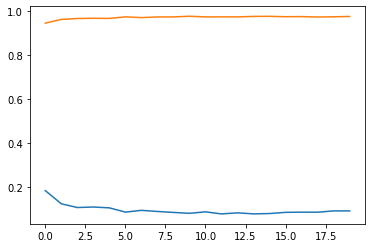

In [10]:
# Gráfico para visualizar os erros e accuracy
historico.history.keys()
# evolução do erro, azul
plt.plot(historico.history['val_loss'])
# performance da rede
plt.plot(historico.history['val_accuracy'])


In [11]:
# Obtenção das previsões
previsoes = modelo.predict(X_teste)
previsoes


313/313 [==============================] - 1s 3ms/step


array([[2.4554112e-19, 4.3074485e-12, 2.1373226e-11, ..., 9.9999994e-01,
        1.3625312e-13, 3.6952368e-08],
       [1.3627576e-07, 1.4377477e-04, 9.9954212e-01, ..., 2.3907427e-05,
        1.2393445e-05, 1.1845783e-09],
       [4.0645599e-12, 9.9999458e-01, 7.3206969e-08, ..., 3.5170240e-06,
        9.1710484e-07, 6.2463568e-09],
       ...,
       [4.4264539e-14, 2.1967588e-12, 2.9779415e-11, ..., 1.8725468e-07,
        3.3474622e-11, 1.7215023e-06],
       [3.4103158e-07, 1.5081842e-08, 4.2213260e-09, ..., 1.7586436e-09,
        5.6706947e-05, 1.1004140e-08],
       [1.3172134e-11, 5.8763365e-14, 8.4174074e-12, ..., 8.4941026e-18,
        2.6198165e-11, 2.2271843e-17]], dtype=float32)

In [12]:
# valor máximo (com a probabilidade maior por serem 10 saídas) e geração da matriz de confusão
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao


array([[ 969,    0,    2,    0,    0,    1,    4,    2,    2,    0],
       [   0, 1124,    1,    2,    0,    0,    2,    1,    5,    0],
       [   4,    1, 1004,    3,    1,    1,    2,    8,    8,    0],
       [   0,    1,    4,  982,    0,    9,    0,    8,    2,    4],
       [   0,    0,    1,    0,  962,    0,    9,    0,    0,   10],
       [   2,    0,    0,    6,    2,  867,    7,    2,    5,    1],
       [   3,    2,    0,    1,    5,    4,  942,    0,    1,    0],
       [   1,    2,   10,    1,    2,    0,    0, 1005,    0,    7],
       [   7,    3,    4,    2,    6,    9,    3,    4,  930,    6],
       [   1,    3,    0,    1,   16,    6,    0,    4,    2,  976]])

In [13]:
# Previsão com um novo registro, convertendo o array para o formato de matriz
# número 4
y_treinamento[20]


array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [14]:
# passo a mesma posição para o modelo prever
novo = X_treinamento[20]
# de matriz para vetor
novo = np.expand_dims(novo, axis=0)
# previsao
pred = modelo.predict(novo)
# maior valor
pred = [np.argmax(pred) for t in pred]
pred


1/1 [==============================] - 0s 31ms/step


[4]